<a href="https://colab.research.google.com/github/bcsrn/Datathon/blob/master/Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!apt install wget

from google.colab import drive
drive.mount('/content/drive/')

Reading package lists... Done
Building dependency tree       
Reading state information... Done
wget is already the newest version (1.19.4-1ubuntu2.2).
0 upgraded, 0 newly installed, 0 to remove and 8 not upgraded.
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import h5py
import glob

In [0]:
data_dir = 'drive/My Drive/Datathon/Data/fb/data'
csv_dir = 'ml_preds_csv'
png_dir = 'ml_preds_png'
H,W = 8192,8192

files = sorted(glob.glob(os.path.join(data_dir, csv_dir,'*.csv')))
file_suffix = ['000','001','010','011','100','101','110','111','002','003','012','013','102','103','112','113','020','021','030','031','120','121','130','131','022','023','032','033','122','123','132','133','200','201','210','211','300','301','310','311','202','203','212','213','302','303','312','313','220','221','230','231','320','321','330','331','222','223','232','233','322','323','332','333']
files_sorted = []

# read CSVs zeroed image
data_csv = []
for f in file_suffix:
  with h5py.File(os.path.join(data_dir,'ml_preds_h5files',f+'.h5'), 'r') as hf:
    data_csv.append(hf['data'][:])



In [0]:
# create road image
import skimage
import cv2

image = np.zeros((H,W))
pixel_i, pixel_j, val = data_csv[0][:, 0].astype(np.int32), data_csv[0][:, 1].astype(np.int32), data_csv[0][:, 2].astype(np.uint8)
image[pixel_i, pixel_j] = val
image[image < 75] = 0

#  get corners in the image
image_corners = cv2.goodFeaturesToTrack(image.astype(np.uint8), 
                                        maxCorners=0, 
                                        minDistance=50,
                                        qualityLevel=0.01,
                                        )

image_trns = skimage.transform.resize(image, (H//8,W//8), order=1, mode='constant')

#erosion and dilation
kernel = np.ones((3,3), np.uint8)
#image_trns = cv2.erode(image_trns, kernel, iterations=1) 
image_trns = cv2.dilate(image_trns, kernel, iterations=1) 

new_image_corners = cv2.goodFeaturesToTrack(image_trns.astype(np.uint8), 
                                        maxCorners=0, 
                                        minDistance=10,
                                        qualityLevel=0.0001,
                                        )
#new_image_corners = np.squeeze(new_image_corners)


In [0]:
temp = np.squeeze(new_image_corners)

new_image_corners = np.stack((temp[:,1], temp[:,0])).T


In [0]:
new_image_corners.shape

(878, 2)

In [0]:
np.unique(image_trns)

array([0.00000000e+00, 2.74158444e-08, 2.74158444e-08, ...,
       2.40517890e+02, 2.40527402e+02, 2.44639090e+02])

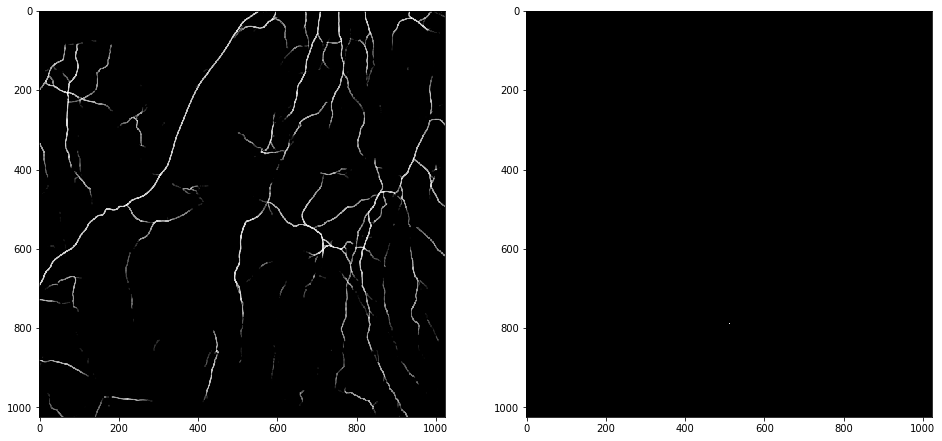

In [0]:
plt.figure(figsize=(16,16))
cc = np.squeeze(new_image_corners).astype(np.int32)
image[cc[:,0], cc[:,1]] = 255
test1 = np.zeros_like(image_trns)
test1[cc[:,0], cc[:,1]] = 255
test2 = np.zeros_like(image_trns)
test2[we_want[:,0], we_want[:,1]] = 255
plt.subplot(121)
plt.imshow(image_trns, cmap='gray')
plt.subplot(122)
plt.imshow(test2, cmap='gray')

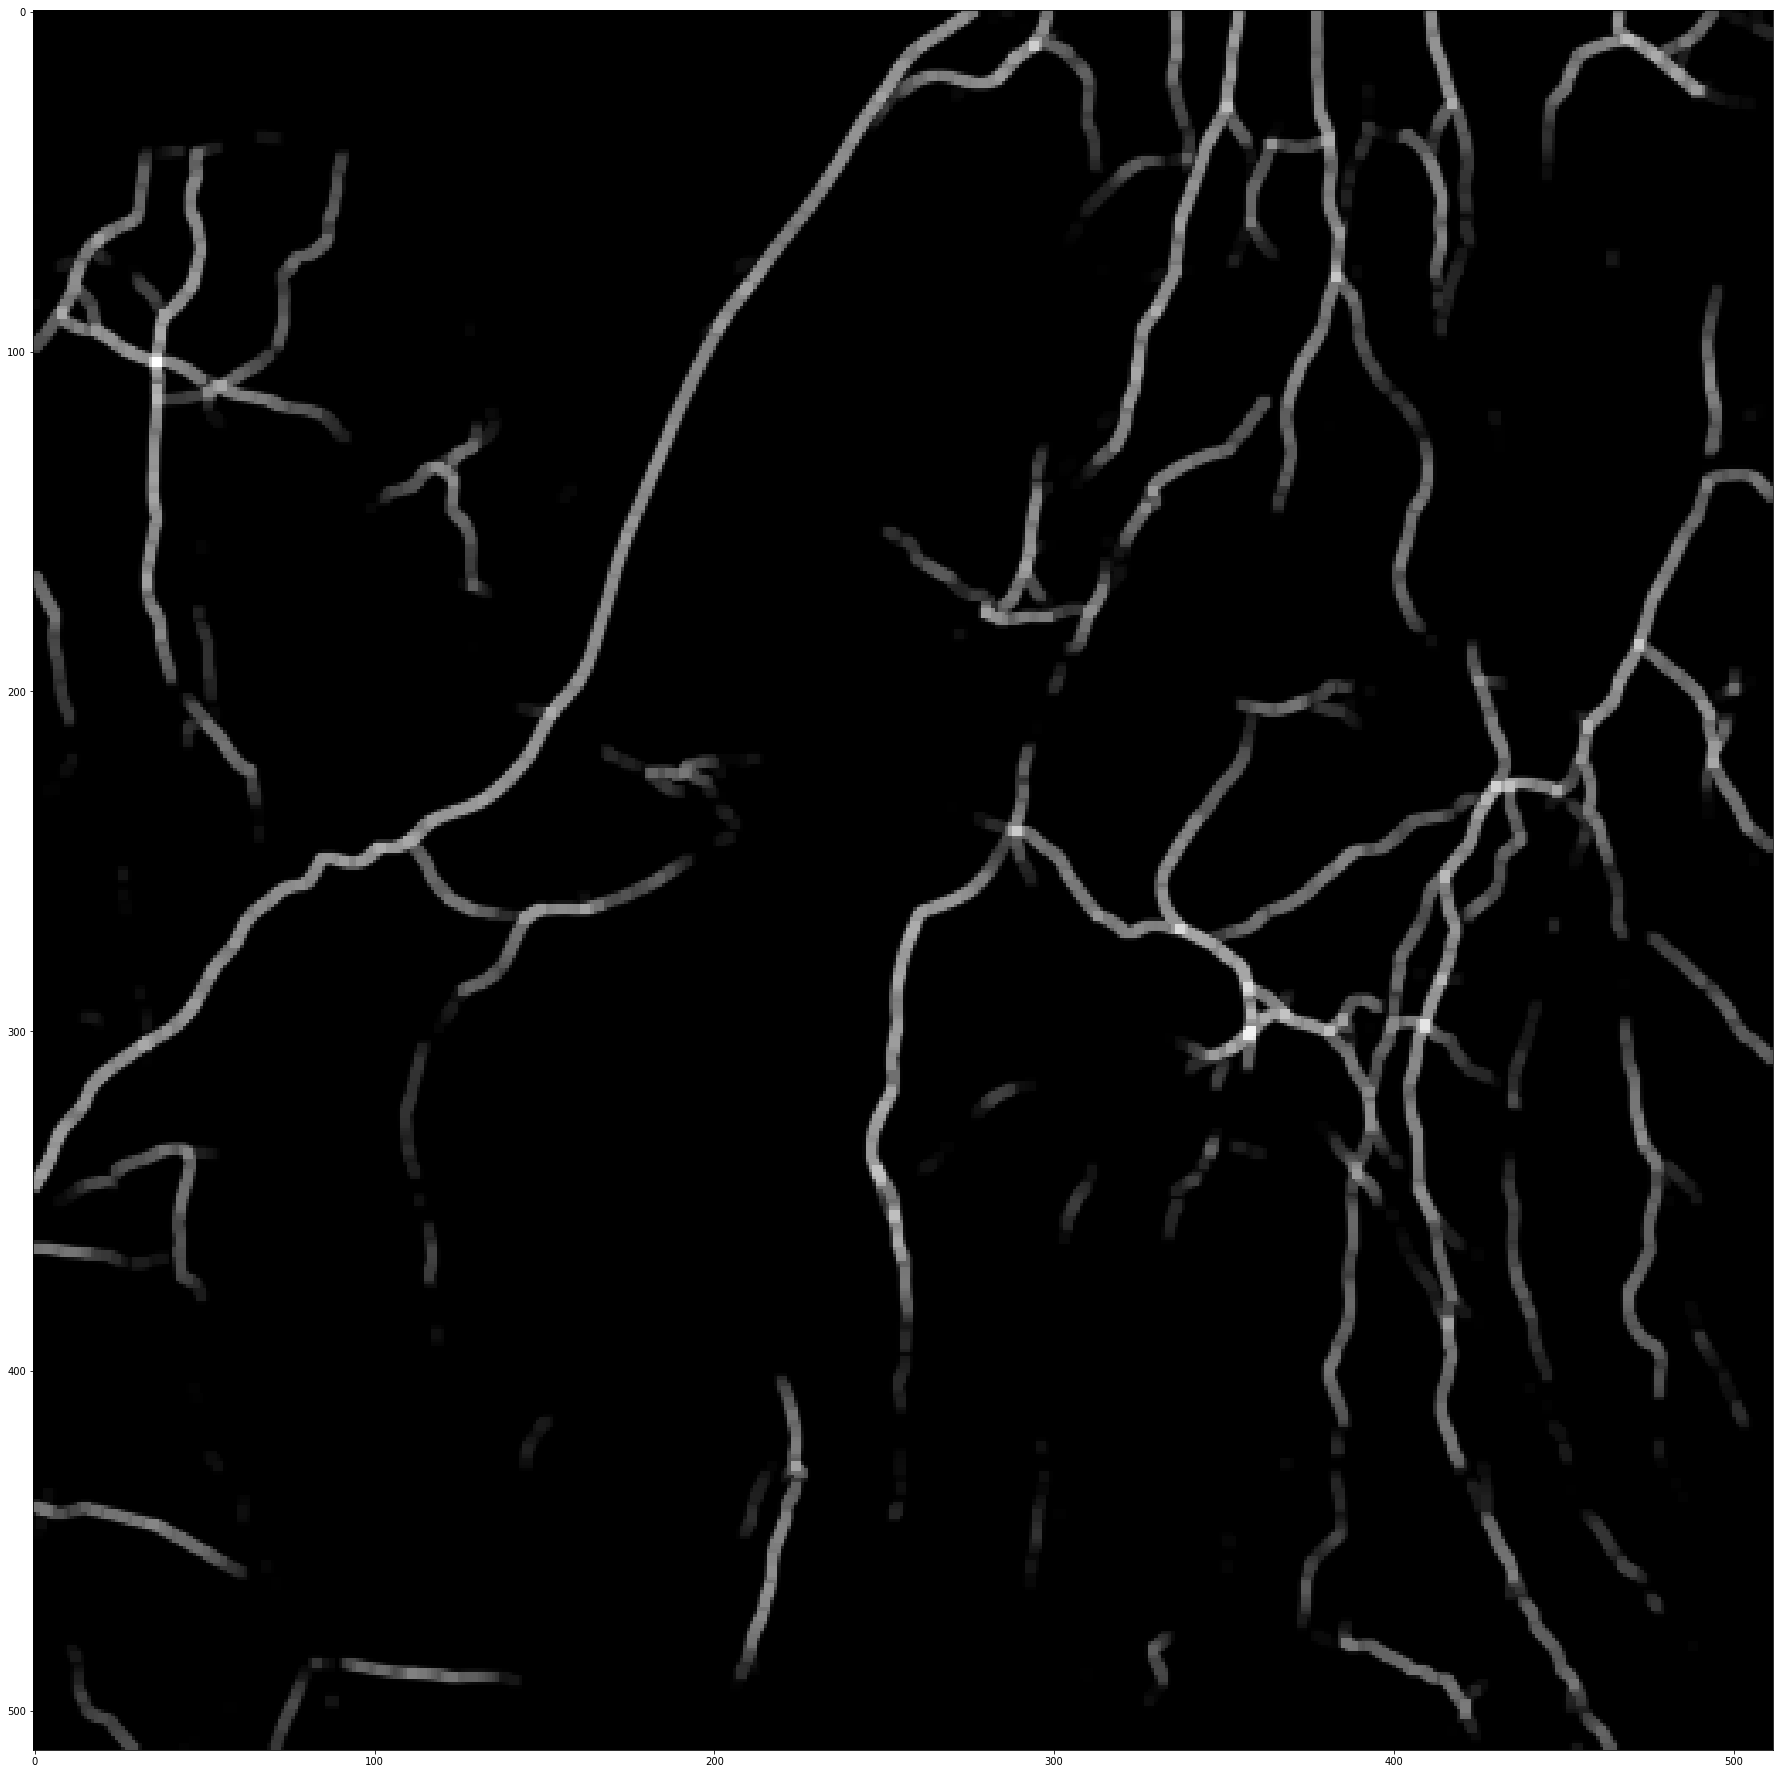

In [0]:
plt.figure(figsize=(32,32))
plt.imshow(image_trns, cmap='gray')

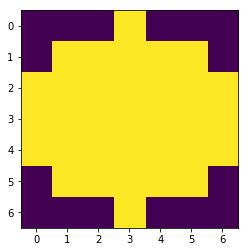

In [0]:
import cv2
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(7,7))
plt.imshow(kernel)

In [0]:
we_want =[]
for corner in new_image_corners:
  x = corner[0]
  y = corner[1]
  cord = np.meshgrid(np.arange(x-3,x+4,dtype=np.int32),np.arange(y-3,y+4,dtype=np.int32))
  some_output = image[cord[0].flatten(), cord[1].flatten()].reshape(7,7) * kernel
  if np.sum(some_output>0) > 6:    
    we_want.append([x,y])

In [0]:
we_want = np.asarray(we_want)
we_want = we_want.astype(np.int32)

In [0]:
np.squeeze(image_corners).astype(np.int32)

array([[5644, 1187],
       [ 537, 4889],
       [5390, 4321],
       ...,
       [1198, 8027],
       [ 824, 3019],
       [7462,  100]], dtype=int32)

In [0]:
we_want[:,0], we_want[:,1]

(array([676, 665, 643, 788, 880, 942, 802, 821, 662, 789, 799, 855, 764,
        775, 849, 860, 669], dtype=int32),
 array([778, 694, 872, 513, 509, 748, 511, 510, 814, 766, 761, 737, 774,
        774, 510, 510, 537], dtype=int32))

In [0]:
np.sum(we_want == 255)

NameError: ignored